In [1]:
# code block for imports 
import pandas as pd 
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns

In [46]:
conn = sqlite3.connect('cs506MAPC.db')

## Display first 10 Providers 

In [44]:
qrystr ="SELECT DISTINCT t1.ProviderName,substr(t1.BlockCode,0,12) as tractNum,t1.MaxAdDown,t1.MaxAdUp, t2.town, t3.Longitude, t3.Latitude FROM FCC_DATA_T t1, censusblocks_t t2, CityLongLat_t t3 WHERE substr(t1.BlockCode,0,12) = t2.blockcode AND t2.town = t3.town ORDER BY t2.town ASC"


#convert query results into dataframe
df_filtered_providers = pd.read_sql_query(qrystr, conn)
display(df_filtered_providers.head(10))

,ProviderName,tractNum,MaxAdDown,MaxAdUp,town,Longitude,Latitude
0,MCI Communications Corporation,25023520100,0.0,0.0,ABINGTON,-70.96,42.12
1,MCI Communications Corporation,25023520201,0.0,0.0,ABINGTON,-70.96,42.12
2,MCI Communications Corporation,25023520202,0.0,0.0,ABINGTON,-70.96,42.12
3,Crown Castle Fiber LLC,25023520100,0.0,0.0,ABINGTON,-70.96,42.12
4,Crown Castle Fiber LLC,25023520201,0.0,0.0,ABINGTON,-70.96,42.12
5,Crown Castle Fiber LLC,25023520202,0.0,0.0,ABINGTON,-70.96,42.12
6,"ViaSat, Inc.",25023520100,100.0,3.0,ABINGTON,-70.96,42.12
7,"ViaSat, Inc.",25023520201,100.0,3.0,ABINGTON,-70.96,42.12
8,"ViaSat, Inc.",25023520202,100.0,3.0,ABINGTON,-70.96,42.12
9,U.S. TelePacific Corp.,25023520202,0.0,0.0,ABINGTON,-70.96,42.12


## Non Zero Providers

In [43]:
qryStr2 = "SELECT DISTINCT t1.ProviderName,substr(t1.BlockCode,0,12) as tractNum,t1.MaxAdDown,t1.MaxAdUp, t2.town, t3.Longitude, t3.Latitude FROM FCC_DATA_T t1, censusblocks_t t2, CityLongLat_t t3 WHERE MaxAdDown != 0.0 AND MaxAdUp != 0.0 and substr(t1.BlockCode,0,12) = t2.blockcode AND t2.town = t3.town ORDER BY t2.town ASC"
df_filtered_non_zero_providers = pd.read_sql_query(qryStr2, conn)
display(df_filtered_non_zero_providers.head(10))


,ProviderName,tractNum,MaxAdDown,MaxAdUp,town,Longitude,Latitude
0,"ViaSat, Inc.",25023520100,100.0,3.000,ABINGTON,-70.96,42.12
1,"ViaSat, Inc.",25023520201,100.0,3.000,ABINGTON,-70.96,42.12
2,"ViaSat, Inc.",25023520202,100.0,3.000,ABINGTON,-70.96,42.12
3,"COMCAST CABLE COMMUNICATIONS, LLC",25023520100,987.0,35.000,ABINGTON,-70.96,42.12
4,"COMCAST CABLE COMMUNICATIONS, LLC",25023520201,987.0,35.000,ABINGTON,-70.96,42.12
5,"COMCAST CABLE COMMUNICATIONS, LLC",25023520202,987.0,35.000,ABINGTON,-70.96,42.12
6,Verizon New England Inc.,25023520202,940.0,880.000,ABINGTON,-70.96,42.12
7,Verizon New England Inc.,25023520202,5.0,0.768,ABINGTON,-70.96,42.12
8,Verizon New England Inc.,25023520202,15.0,1.000,ABINGTON,-70.96,42.12
9,Verizon New England Inc.,25023520202,10.0,1.000,ABINGTON,-70.96,42.12


## Zero Providers

In [42]:
qryStr3 = "SELECT DISTINCT t1.ProviderName,substr(t1.BlockCode,0,12) as tractNum,t1.MaxAdDown,t1.MaxAdUp, t2.town, t3.Longitude, t3.Latitude FROM FCC_DATA_T t1, censusblocks_t t2, CityLongLat_t t3 WHERE MaxAdDown = 0 AND MaxAdUp = 0 and substr(t1.BlockCode,0,12) = t2.blockcode AND t2.town = t3.town ORDER BY t2.town ASC"
df_filtered_zero_providers = pd.read_sql_query(qryStr3, conn)
display(df_filtered_zero_providers.head(10))

,ProviderName,tractNum,MaxAdDown,MaxAdUp,town,Longitude,Latitude
0,MCI Communications Corporation,25023520100,0.0,0.0,ABINGTON,-70.96,42.12
1,MCI Communications Corporation,25023520201,0.0,0.0,ABINGTON,-70.96,42.12
2,MCI Communications Corporation,25023520202,0.0,0.0,ABINGTON,-70.96,42.12
3,Crown Castle Fiber LLC,25023520100,0.0,0.0,ABINGTON,-70.96,42.12
4,Crown Castle Fiber LLC,25023520201,0.0,0.0,ABINGTON,-70.96,42.12
5,Crown Castle Fiber LLC,25023520202,0.0,0.0,ABINGTON,-70.96,42.12
6,U.S. TelePacific Corp.,25023520202,0.0,0.0,ABINGTON,-70.96,42.12
7,"Broadview Networks Holdings, Inc.",25023520100,0.0,0.0,ABINGTON,-70.96,42.12
8,"COMCAST CABLE COMMUNICATIONS, LLC",25023520201,0.0,0.0,ABINGTON,-70.96,42.12
9,"COMCAST CABLE COMMUNICATIONS, LLC",25023520100,0.0,0.0,ABINGTON,-70.96,42.12


## Max Providers Per Area

In [41]:
town_dict = {}
towns = df_filtered_zero_providers['town']
providers = df_filtered_zero_providers['ProviderName']
df_towns_providers = pd.concat([towns, providers], axis=1)
numpy_arr = df_towns_providers.to_numpy()
for i in range(len(numpy_arr)):
    town_name = numpy_arr[i][0]
    if town_name not in town_dict.keys():
        town_dict[town_name] = [numpy_arr[i][1]]
    elif numpy_arr[i][1] not in town_dict.get(town_name):
        town_dict[town_name].append(numpy_arr[i][1])
    else:
        continue

num_providers_dict = {}
for key in town_dict.keys():
    num_providers_dict[key] = len(town_dict.get(key))

df_num_providers = pd.DataFrame(num_providers_dict.items(), columns=['Town', 'ProviderCount'])
display(df_num_providers)

,Town,ProviderCount
0,ABINGTON,9
1,ACUSHNET CENTER,4
2,ADAMS,5
3,AGAWAM TOWN,13
4,AMESBURY TOWN,8
...,...,...
179,WINCHENDON,6
180,WINCHESTER,7
181,WINTHROP TOWN,10
182,WOBURN,17


## Display top/bottom 5 areas by number of providers (& Revere, Everett, Quincy)

,Town,ProviderCount
0,CAMBRIDGE,21
1,BOSTON,18
2,WORCESTER,18
3,SOMERVILLE,17
4,WALTHAM,17
5,HANSON,1
6,OCEAN GROVE,1
7,SOUTH AMHERST,1
8,WEST FALMOUTH,1
9,BLISS CORNER,2


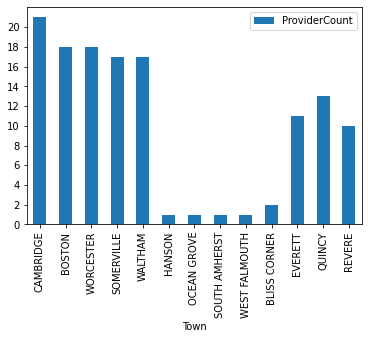

In [40]:
five_most_providers = dict(sorted(num_providers_dict.items(), key=lambda item: item[1], reverse=True)[:5])
five_least_providers = dict(sorted(num_providers_dict.items(), key=lambda item: item[1])[:5])
everett_providers = {'EVERETT': num_providers_dict.get('EVERETT')}
quincy_providers = {'QUINCY': num_providers_dict.get('QUINCY')}
revere_providers = {'REVERE': num_providers_dict.get('REVERE')}
plot_providers = {**five_most_providers, **five_least_providers, **everett_providers, **quincy_providers, **revere_providers}
df_plot_providers = pd.DataFrame(plot_providers.items(), columns=['Town', 'ProviderCount'])

y_max_tick = max(plot_providers.values())

display(df_plot_providers)
df_plot_providers.plot(x='Town', y='ProviderCount', kind='bar')
plt.yticks(np.arange(0, y_max_tick, 2))
plt.show()

## MaxAdDown

,MaxAdDown,Town
0,1000.0,WESTFIELD
1,1000.0,AMHERST CENTER
2,500.0,WOBURN
3,500.0,WINCHESTER
4,500.0,WELLESLEY
5,500.0,WATERTOWN TOWN
6,500.0,WALTHAM
7,500.0,STONEHAM
8,500.0,SOMERVILLE
9,500.0,SAUGUS


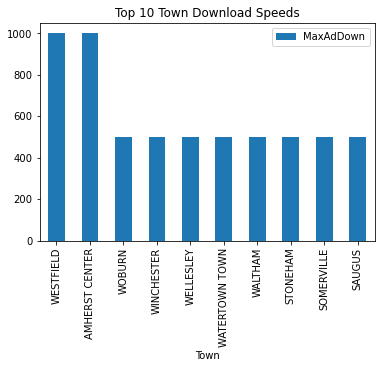

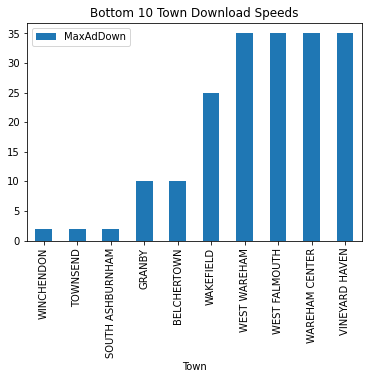

In [38]:
qryStr4 = "SELECT DISTINCT t1.MaxAdDown, t2.town as Town FROM FCC_DATA_T t1, censusblocks_t t2, CityLongLat_t t3 WHERE MaxAdDown != 0.0 AND MaxAdUp != 0.0 and substr(t1.BlockCode,0,12) = t2.blockcode AND t2.town = t3.town GROUP BY t2.town ORDER BY MaxAdDown DESC"
df_filtered_max_down = pd.read_sql_query(qryStr4, conn)
display(df_filtered_max_down.head(10))

top_ten = df_filtered_max_down.nlargest(10, ['MaxAdDown'])
bottom_ten = df_filtered_max_down.nsmallest(10, ['MaxAdDown'])

top_ten.plot(x='Town', y='MaxAdDown', kind='bar', title = "Top 10 Town Download Speeds")
plt.show()

bottom_ten.plot(x='Town', y='MaxAdDown', kind='bar', title = "Bottom 10 Town Download Speeds")
plt.show()

## MaxAdUp

,MaxAdUp,Town
0,1000.0,WESTFIELD
1,1000.0,AMHERST CENTER
2,150.0,WEST CONCORD
3,20.0,WOBURN
4,20.0,WINCHESTER
5,20.0,WELLESLEY
6,20.0,WATERTOWN TOWN
7,20.0,WALTHAM
8,20.0,STONEHAM
9,20.0,SOMERVILLE


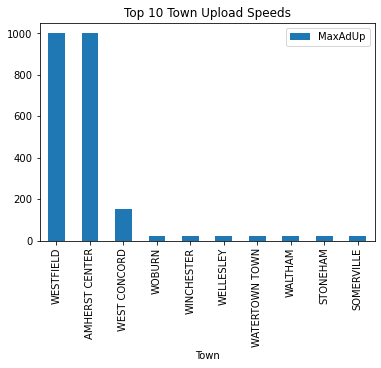

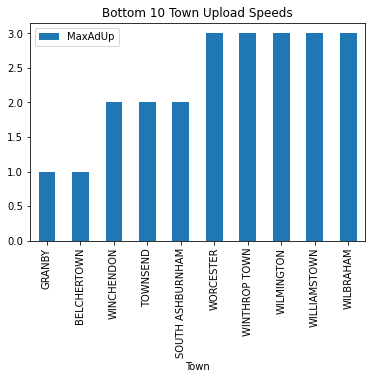

In [39]:
qryStr5 = "SELECT DISTINCT t1.MaxAdUp, t2.town as Town FROM FCC_DATA_T t1, censusblocks_t t2, CityLongLat_t t3 WHERE MaxAdDown != 0.0 AND MaxAdUp != 0.0 and substr(t1.BlockCode,0,12) = t2.blockcode AND t2.town = t3.town GROUP BY t2.town ORDER BY MaxAdUp DESC"
df_filtered_max_up = pd.read_sql_query(qryStr5, conn)
display(df_filtered_max_up.head(10))

top_ten = df_filtered_max_up.nlargest(10, ['MaxAdUp'])
bottom_ten = df_filtered_max_up.nsmallest(10, ['MaxAdUp'])

top_ten.plot(x='Town', y='MaxAdUp', kind='bar', title = "Top 10 Town Upload Speeds")
plt.show()

bottom_ten.plot(x='Town', y='MaxAdUp', kind='bar', title = "Bottom 10 Town Upload Speeds")
plt.show()

## Median Income Per Race (Census Tracks)

In [10]:
qryStr6 = "SELECT t2.Town as Town, AVG(t1.mhi) as 'Average Median Income' FROM median_income_t t1, censusblocks_t t2 WHERE t2.blockcode = t1.ct10_id and t1.mhi > 1 GROUP BY t2.Town;"
town_median_income  = pd.read_sql_query(qryStr6, conn)
town_median_income

,Town,Average Median Income
0,ABINGTON,89531.333333
1,ACUSHNET CENTER,69091.500000
2,ADAMS,50431.000000
3,AGAWAM TOWN,70442.500000
4,AMESBURY TOWN,83022.250000
...,...,...
177,WINCHENDON,74986.000000
178,WINCHESTER,160758.800000
179,WINTHROP TOWN,80237.333333
180,WOBURN,87139.285714


In [11]:
town_median_income.sort_values(by=['Average Median Income'])
top_five_towns = town_median_income.nlargest(5, ['Average Median Income'])
bottom_five_towns = town_median_income.nsmallest(5, ['Average Median Income'])
revere = town_median_income.loc[town_median_income['Town'] == 'REVERE']
quincy = town_median_income.loc[town_median_income['Town'] == 'QUINCY']
everett = town_median_income.loc[town_median_income['Town'] == 'EVERETT']
combined_median_income_df = pd.concat([top_five_towns, bottom_five_towns, revere, quincy, everett], axis=0)
combined_median_income_df = combined_median_income_df.reset_index(drop=True)
combined_median_income_df

,Town,Average Median Income
0,DOVER,224784.000000
1,WELLESLEY,183744.285714
2,BOXFORD,174340.000000
3,LEXINGTON,174233.166667
4,HOPKINTON,167733.500000
5,SPRINGFIELD,38017.162162
6,NORTH ADAMS,38142.500000
7,LAWRENCE,39653.166667
8,HOLYOKE,40761.636364
9,FALL RIVER,43967.920000


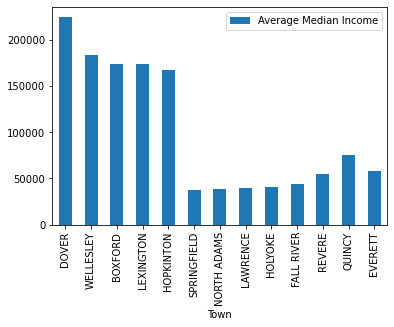

In [12]:
combined_median_income_df.plot(x='Town', y='Average Median Income', kind='bar') 
plt.show()

In [13]:
qryStr7 = "SELECT t2.Town as Town, ROUND(AVG(t1.MaxAdDown),2) as AverageMaxDown, ROUND(AVG(t1.MaxAdUp),2) as AverageMaxUp FROM fcc_data_t t1, censusblocks_t t2 WHERE substr(t1.BlockCode,0,12) = t2.blockcode GROUP BY t2.TOWN"
town_average_speeds  = pd.read_sql_query(qryStr7, conn)
town_average_speeds

,Town,AverageMaxDown,AverageMaxUp
0,ABINGTON,250.73,111.99
1,ACUSHNET CENTER,170.98,25.24
2,ADAMS,178.95,7.60
3,AGAWAM TOWN,144.87,5.77
4,AMESBURY TOWN,144.11,5.67
...,...,...,...
179,WINCHENDON,115.36,4.68
180,WINCHESTER,261.78,116.97
181,WINTHROP TOWN,144.88,10.11
182,WOBURN,281.54,92.69


In [14]:
dover = town_average_speeds.loc[town_average_speeds['Town'] == 'DOVER']
wellesley = town_average_speeds.loc[town_average_speeds['Town'] == 'WELLESLEY']
boxford = town_average_speeds.loc[town_average_speeds['Town'] == 'BOXFORD']
lexington = town_average_speeds.loc[town_average_speeds['Town'] == 'LEXINGTON']
hopkinton = town_average_speeds.loc[town_average_speeds['Town'] == 'HOPKINTON']
springfield = town_average_speeds.loc[town_average_speeds['Town'] == 'SPRINGFIELD']
north_adams = town_average_speeds.loc[town_average_speeds['Town'] == 'NORTH ADAMS']
lawrence = town_average_speeds.loc[town_average_speeds['Town'] == 'LAWRENCE']
holyoke = town_average_speeds.loc[town_average_speeds['Town'] == 'HOLYOKE']
fall_river = town_average_speeds.loc[town_average_speeds['Town'] == 'FALL RIVER']
revere = town_average_speeds.loc[town_average_speeds['Town'] == 'REVERE']
quincy = town_average_speeds.loc[town_average_speeds['Town'] == 'QUINCY']
everett = town_average_speeds.loc[town_average_speeds['Town'] == 'EVERETT']

combined_average_speed_df = pd.concat([dover, wellesley, boxford, lexington, hopkinton, springfield, north_adams, lawrence, holyoke, fall_river, revere, quincy, everett], axis=0)
combined_average_speed_df = combined_average_speed_df.reset_index(drop=True)
combined_average_speed_df

,Town,AverageMaxDown,AverageMaxUp
0,DOVER,266.60,116.52
1,WELLESLEY,271.43,114.13
2,BOXFORD,229.41,98.39
3,LEXINGTON,281.84,92.27
4,HOPKINTON,253.57,112.75
5,SPRINGFIELD,143.97,5.65
6,NORTH ADAMS,181.18,8.01
7,LAWRENCE,249.54,110.73
8,HOLYOKE,135.08,5.35
9,FALL RIVER,147.38,5.87


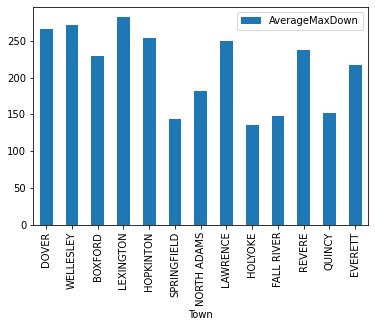

In [15]:
combined_average_speed_df.plot(x='Town', y='AverageMaxDown', kind='bar') 
plt.show()

In [16]:
median_income_and_speed_df = combined_average_speed_df
median_income_and_speed_df['Average Median Income'] = combined_median_income_df['Average Median Income']
median_income_and_speed_df

,Town,AverageMaxDown,AverageMaxUp,Average Median Income
0,DOVER,266.60,116.52,224784.000000
1,WELLESLEY,271.43,114.13,183744.285714
2,BOXFORD,229.41,98.39,174340.000000
3,LEXINGTON,281.84,92.27,174233.166667
4,HOPKINTON,253.57,112.75,167733.500000
5,SPRINGFIELD,143.97,5.65,38017.162162
6,NORTH ADAMS,181.18,8.01,38142.500000
7,LAWRENCE,249.54,110.73,39653.166667
8,HOLYOKE,135.08,5.35,40761.636364
9,FALL RIVER,147.38,5.87,43967.920000


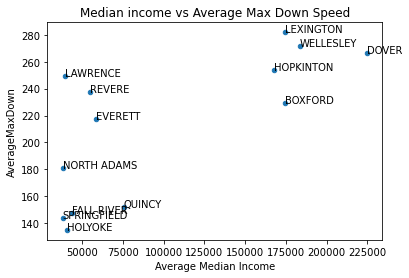

In [17]:
ax1 = median_income_and_speed_df.plot(kind='scatter', x='Average Median Income', y='AverageMaxDown', title='Median income vs Average Max Down Speed',)    

# annotate points in axis
for idx, row in median_income_and_speed_df.iterrows():
    ax1.annotate(row['Town'], (row['Average Median Income'], row['AverageMaxDown']))

plt.show()


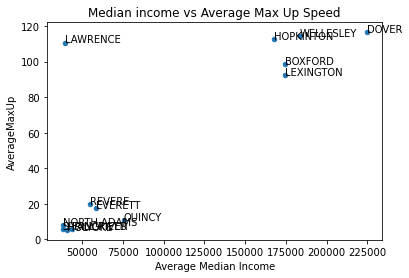

In [18]:
ax2 = median_income_and_speed_df.plot(kind='scatter', x='Average Median Income', y='AverageMaxUp', title='Median income vs Average Max Up Speed',)    

# annotate points in axis
for idx, row in median_income_and_speed_df.iterrows():
    ax2.annotate(row['Town'], (row['Average Median Income'], row['AverageMaxUp']))

plt.show()

## Heatmaps for Max Ad Download & Upload Speed per Area

In [19]:
def generateBaseMap(default_location=[42.360081, -71.058884]):
    base_map = folium.Map(location=default_location)
    return base_map
    
# download speed
base_map = generateBaseMap()

HeatMap(data=df_filtered_non_zero_providers [['Latitude', 'Longitude', 'MaxAdDown']].groupby(  
['Latitude', 'Longitude']). mean().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map.save('maxaddown.html')

# upload speed
base_map = generateBaseMap()
HeatMap(data=df_filtered_non_zero_providers [['Latitude', 'Longitude', 'MaxAdUp']].groupby(['Latitude', 'Longitude']).mean().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

base_map.save('maxadup.html')

## Heatmap for # of Providers per Area

In [20]:
def generateBaseMap(default_location=[42.360081, -71.058884]):
    base_map = folium.Map(location=default_location)
    return base_map

base_map = generateBaseMap()

df_town_coords = df_filtered_non_zero_providers.drop_duplicates(subset=['town'])

df_num_providers_coords = pd.merge(left=df_num_providers, right=df_town_coords[['town', 'Longitude', 'Latitude']], left_on='Town', right_on='town')

df_num_providers_coords = df_num_providers_coords.drop(columns=['town'])

HeatMap(data=df_num_providers_coords [['Latitude', 'Longitude', 'ProviderCount']].groupby(['Latitude', 'Longitude']).mean().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

base_map.save('numproviders.html')

## Create a csv file that maps out each town to a list of Providers

In [21]:
qryTownProvider = "SELECT DISTINCT t2.town as Town, t1.ProviderName FROM FCC_DATA_T t1, censusblocks_t t2 WHERE substr(t1.BlockCode,0,12) = t2.blockcode ORDER BY t2.town ASC"
df_townProvider = pd.read_sql_query(qryTownProvider, conn)
df_townProvider.to_csv("Town_Provider.csv",index=False)

## Scatter Plot: Number of Providers vs Average Upload/Download Speed

                Town  ProviderCount  AverageMaxDown  AverageMaxUp
0           ABINGTON              9          250.73        111.99
1    ACUSHNET CENTER              4          170.98         25.24
2              ADAMS              5          178.95          7.60
3        AGAWAM TOWN             13          144.87          5.77
4      AMESBURY TOWN              8          144.11          5.67
..               ...            ...             ...           ...
179       WINCHENDON              6          115.36          4.68
180       WINCHESTER              7          261.78        116.97
181    WINTHROP TOWN             10          144.88         10.11
182           WOBURN             17          281.54         92.69
183        WORCESTER             18          175.23          7.00

[184 rows x 4 columns]


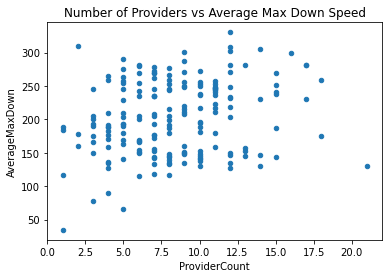

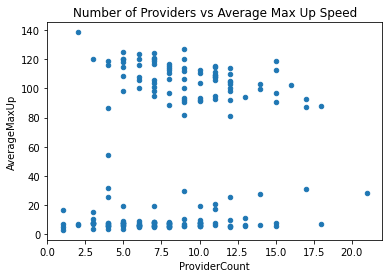

In [22]:
df_num_providers_speeds = pd.merge(left=df_num_providers, right=town_average_speeds, left_on='Town', right_on='Town')

display(df_num_providers_speeds)

ax1 = df_num_providers_speeds.plot(kind='scatter', x='ProviderCount', y='AverageMaxDown', title='Number of Providers vs Average Max Down Speed',)

ax2 = df_num_providers_speeds.plot(kind='scatter', x='ProviderCount', y='AverageMaxUp', title='Number of Providers vs Average Max Up Speed',)

plt.show()

## Scatter Plot: Average Median Income vs Max Advertised Up/Down Speed

,Town,Average Median Income,MaxAdDown,MaxAdUp
0,ABINGTON,89531.333333,100.0,3.0
1,ACUSHNET CENTER,69091.500000,100.0,3.0
2,ADAMS,50431.000000,35.0,3.0
3,AGAWAM TOWN,70442.500000,100.0,3.0
4,AMESBURY TOWN,83022.250000,100.0,3.0
...,...,...,...,...
177,WINCHENDON,74986.000000,2.0,2.0
178,WINCHESTER,160758.800000,500.0,20.0
179,WINTHROP TOWN,80237.333333,100.0,3.0
180,WOBURN,87139.285714,500.0,20.0


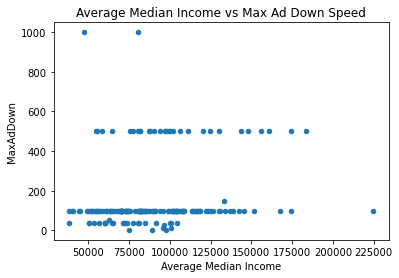

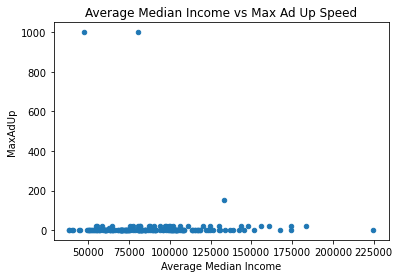

In [37]:
df_median_income_speeds = pd.merge(left=town_median_income, right=df_filtered_max_down, left_on='Town', right_on='Town')
df_median_income_speeds = pd.merge(left=df_median_income_speeds, right=df_filtered_max_up, left_on='Town', right_on='Town')

display(df_median_income_speeds)

ax1 = df_median_income_speeds.plot(kind='scatter', x='Average Median Income', y='MaxAdDown', title='Average Median Income vs Max Ad Down Speed',)

ax2 = df_median_income_speeds.plot(kind='scatter', x='Average Median Income', y='MaxAdUp', title='Average Median Income vs Max Ad Up Speed',)

plt.show()

# % Unemployment vs Upload and Download Speeds

,Town,Unemployment %,AverageMaxDown,AverageMaxUp
0,ABINGTON,6.38,250.73,111.99
1,ACUSHNET CENTER,5.85,170.98,25.24
2,ADAMS,4.78,178.95,7.60
3,AGAWAM TOWN,5.00,144.87,5.77
4,AMESBURY TOWN,2.88,144.11,5.67
...,...,...,...,...
178,WINCHENDON,4.18,115.36,4.68
179,WINCHESTER,1.82,261.78,116.97
180,WINTHROP TOWN,1.85,144.88,10.11
181,WOBURN,5.26,281.54,92.69


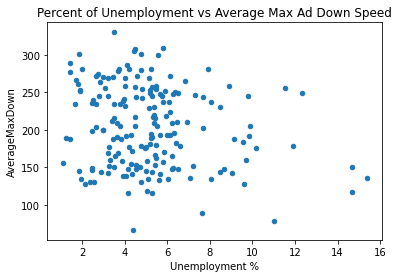

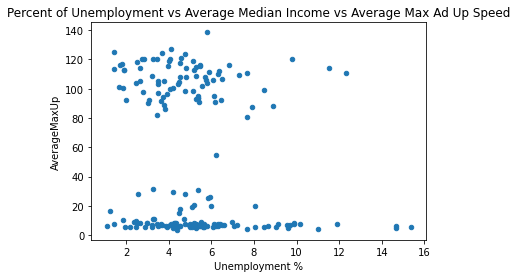

In [36]:
# qryStr6 = "SELECT t2.Town as Town, AVG(t1.mhi) as 'Average Median Income' FROM median_income_t t1, censusblocks_t t2 WHERE t2.blockcode = t1.ct10_id and t1.mhi > 1 GROUP BY t2.Town;"
qryUnemployment ="SELECT t2.town as Town, t1.unemp_p as 'Unemployment %' FROM laborforce_t t1, censusblocks_t t2 WHERE t2.blockcode = t1.ct10_id and t1.unemp > 1 GROUP BY t2.Town;"
unemployment_df = pd.read_sql_query(qryUnemployment, conn)
unemployment_df = pd.merge(left = unemployment_df, right = town_average_speeds, left_on='Town', right_on='Town')
display(unemployment_df)

# plotting against Max Down and Max Up
ax1 = unemployment_df.plot(kind='scatter', x='Unemployment %', y='AverageMaxDown', title='Percent of Unemployment vs Average Max Ad Down Speed',)

ax2 = unemployment_df.plot(kind='scatter', x='Unemployment %', y='AverageMaxUp', title='Percent of Unemployment vs Average Median Income vs Average Max Ad Up Speed',)

plt.show()

# % Population/HouseholdSize/ No. of Families vs Upload and Download Speeds

,Town,Population,Number of families,Number of households,AverageMaxDown,AverageMaxUp
0,ABINGTON,6458,1660,2359,250.73,111.99
1,ACUSHNET CENTER,6916,1954,2555,170.98,25.24
2,ADAMS,2680,670,1339,178.95,7.60
3,AGAWAM TOWN,3240,956,1174,144.87,5.77
4,AMESBURY TOWN,4032,1065,1544,144.11,5.67
...,...,...,...,...,...,...
179,WINCHENDON,8340,2126,3091,115.36,4.68
180,WINCHESTER,2964,807,1027,261.78,116.97
181,WINTHROP TOWN,4766,1146,2347,144.88,10.11
182,WOBURN,7399,1955,3118,281.54,92.69


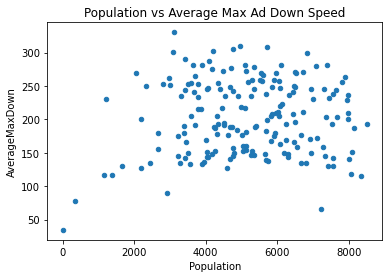

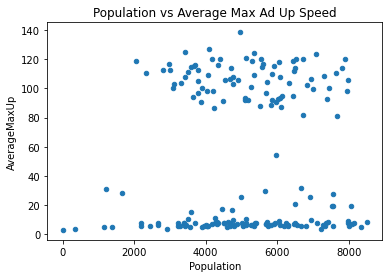

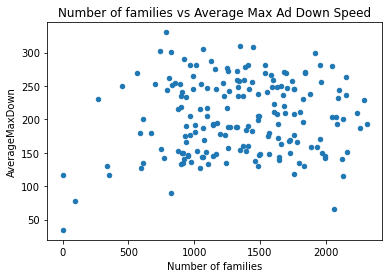

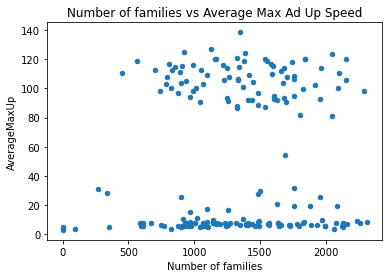

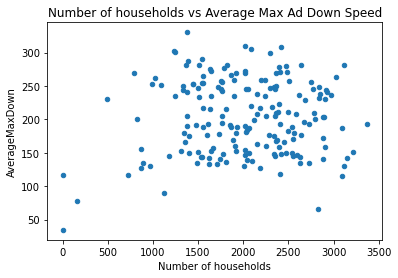

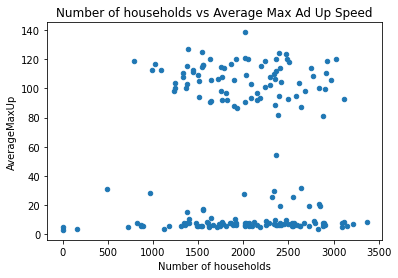

In [48]:
qryPopulationData = "SELECT t2.town as Town, t1.pop as 'Population', t1.fam as 'Number of families', t1.hh as 'Number of households' FROM demographics_t t1, censusblocks_t t2 WHERE t2.blockcode = t1.ct10_id GROUP BY t2.Town;"
population_df = pd.read_sql_query(qryPopulationData, conn)
population_df = pd.merge(left = population_df, right = town_average_speeds, left_on='Town', right_on='Town')
display(population_df)

# plotting against Max Down and Max Up
ax1_1 = population_df.plot(kind='scatter', x='Population', y='AverageMaxDown', title='Population vs Average Max Ad Down Speed',)
ax1_2 = population_df.plot(kind='scatter', x='Population', y='AverageMaxUp', title='Population vs Average Max Ad Up Speed',)

ax2_1 = population_df.plot(kind='scatter', x='Number of families', y='AverageMaxDown', title='Number of families vs Average Max Ad Down Speed',)
ax2_2 = population_df.plot(kind='scatter', x='Number of families', y='AverageMaxUp', title='Number of families vs Average Max Ad Up Speed',)

ax3_1 = population_df.plot(kind='scatter', x='Number of households', y='AverageMaxDown', title='Number of households vs Average Max Ad Down Speed',)
ax3_2 = population_df.plot(kind='scatter', x='Number of households', y='AverageMaxUp', title='Number of households vs Average Max Ad Up Speed',)

plt.show()